In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from scipy.stats import mannwhitneyu
%matplotlib inline

## import all from file 

In [3]:
#load results
permanova_all_df = pd.read_csv('../../data/simulations/ihmp/benchmarks/permanova-test-5iter-last.csv', index_col=0)
apr_all_df = pd.read_csv('../../data/simulations/ihmp/benchmarks/apr-test-5iter-last.csv', index_col=0)
roc_all_df = pd.read_csv('../../data/simulations/ihmp/benchmarks/roc-auc-test-5iter-last.csv', index_col=0)

In [4]:
cmap_ = {'Joint-RPCA':'#377eb8', 
         'MOFA':'#ff7f0e',
         'mixOmics':'#2ca02c',
         'iCluster':'#d62728',
         'intNMF':'#9467bd'}

cmap_updated_ = {'Joint-RPCA':'#377eb8', 
         'MOFA+':'#ff7f0e',
         'Multiblock sPLS':'#2ca02c',
         'iCluster':'#d62728',
         'intNMF':'#9467bd'}

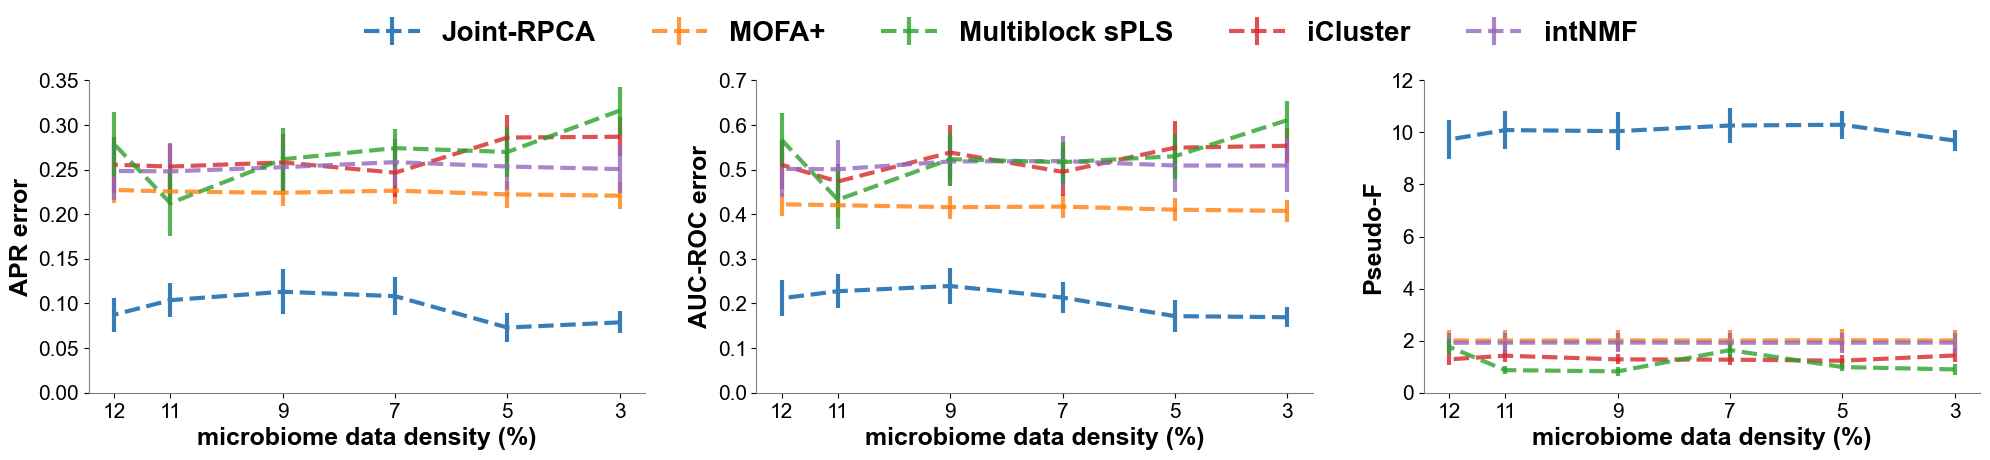

In [ ]:
sims_ = ['meta_g_taxonomic_profiles', 'meta_g_taxonomic_profiles_11', 
         'meta_g_taxonomic_profiles_9', 'meta_g_taxonomic_profiles_7', 
         'meta_g_taxonomic_profiles_5', 'meta_g_taxonomic_profiles_3']

#calculate apr error
apr_all_df['apr_error'] = 1 - apr_all_df.apr
apr_all_df_subset = apr_all_df[apr_all_df.dataset.isin(sims_)]
apr_all_df_subset['density'] = [12 if x == 'meta_g_taxonomic_profiles' else int(x.split('_')[-1])
                               for x in apr_all_df_subset.dataset]
#calculate roc error
roc_all_df['roc_error'] = 1 - roc_all_df.roc_auc
roc_all_df_subset = roc_all_df[roc_all_df.dataset.isin(sims_)]
roc_all_df_subset['density'] = [12 if x == 'meta_g_taxonomic_profiles' else int(x.split('_')[-1])
                               for x in roc_all_df_subset.dataset]

permanova_all_df_subset = permanova_all_df[permanova_all_df.dataset.isin(sims_)]
permanova_all_df_subset['density'] = [12 if x == 'meta_g_taxonomic_profiles' else int(x.split('_')[-1])
                                      for x in permanova_all_df_subset.dataset]

order_ = sorted(set(apr_all_df_subset['density']))[::-1]

fig, axn = plt.subplots(1, 3, figsize=(20, 4))

apr_all_df_subset_ = apr_all_df_subset[apr_all_df_subset.method.isin(['Joint-RPCA'])]
apr_all_df_subset_grp = apr_all_df_subset_.groupby('density')
axn[0].errorbar(apr_all_df_subset_grp.mean(numeric_only=True).index.values,
                apr_all_df_subset_grp.mean(numeric_only=True)['apr_error'].values,
                yerr=apr_all_df_subset_grp.sem(numeric_only=True)['apr_error'].values,
                label='Joint-RPCA', lw=3, ls='--', c=cmap_['Joint-RPCA'])

roc_all_df_subset_ = roc_all_df_subset[roc_all_df_subset.method.isin(['Joint-RPCA'])]
roc_all_df_subset_grp = roc_all_df_subset_.groupby('density')
axn[1].errorbar(roc_all_df_subset_grp.mean(numeric_only=True).index.values,
                roc_all_df_subset_grp.mean(numeric_only=True)['roc_error'].values,
                yerr=roc_all_df_subset_grp.sem(numeric_only=True)['roc_error'].values,
                label='Joint-RPCA', lw=3, ls='--', c=cmap_['Joint-RPCA'])

permanova_all_df_subset_ = permanova_all_df_subset[permanova_all_df_subset.method.isin(['Joint-RPCA'])]
permanova_all_df_subset_grp = permanova_all_df_subset_.groupby('density')
axn[2].errorbar(permanova_all_df_subset_grp.mean(numeric_only=True).index.values,
                permanova_all_df_subset_grp.mean(numeric_only=True)['f_stat'].values,
                yerr=permanova_all_df_subset_grp.sem(numeric_only=True)['f_stat'].values,
                label='Joint-RPCA', lw=3, ls='--', c=cmap_['Joint-RPCA'])

for method_, apr_all_df_subset_ in apr_all_df_subset.groupby('method'):
    if method_ in ['Joint-RPCA']:
        continue
    apr_all_df_subset_grp = apr_all_df_subset_.groupby('density')
    axn[0].errorbar(apr_all_df_subset_grp.mean(numeric_only=True).index.values,
                    apr_all_df_subset_grp.mean(numeric_only=True)['apr_error'].values,
                    yerr=apr_all_df_subset_grp.sem(numeric_only=True)['apr_error'].values,
                    label=method_, lw=3, alpha=0.8, ls='--', c=cmap_[method_])

for method_, roc_all_df_subset_ in roc_all_df_subset.groupby('method'):
    if method_ in ['Joint-RPCA']:
        continue
    roc_all_df_subset_grp = roc_all_df_subset_.groupby('density')
    axn[1].errorbar(roc_all_df_subset_grp.mean(numeric_only=True).index.values,
                    roc_all_df_subset_grp.mean(numeric_only=True)['roc_error'].values,
                    yerr=roc_all_df_subset_grp.sem(numeric_only=True)['roc_error'].values,
                    label=method_, lw=3, alpha=0.8, ls='--', c=cmap_[method_])

for method_, permanova_all_df_subset_ in permanova_all_df_subset.groupby('method'):
    if method_ in ['Joint-RPCA']:
        continue
    permanova_all_df_grp = permanova_all_df_subset_.groupby('density')
    axn[2].errorbar(permanova_all_df_grp.mean(numeric_only=True).index.values,
                    permanova_all_df_grp.mean(numeric_only=True)['f_stat'].values,
                    yerr=permanova_all_df_grp.sem(numeric_only=True)['f_stat'].values,
                    label=method_, lw=3, alpha=0.8, ls='--', c=cmap_[method_])

axn[0].set_ylabel('APR error', fontname='Arial',
                  color='black', weight='bold', fontsize=18)
axn[1].set_ylabel('AUC-ROC error', fontname='Arial',
                  color='black', weight='bold', fontsize=18)
axn[2].set_ylabel('Pseudo-F', fontname='Arial',
                  color='black', weight='bold', fontsize=18)

for ax in axn:
    ax.invert_xaxis()
    ax.set_xlabel('microbiome data density (%)',
                  color='black', fontname='Arial',
                  weight='bold', fontsize=18)

    # fix backround
    ax.set_facecolor('white')
    ax.set_axisbelow(True)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['top'].set_visible(False)
    for child in ax.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_color('grey')

    for tick in ax.get_yticklabels():
        tick.set_fontproperties('arial')
        tick.set_color("black")
        tick.set_fontsize(15)
    for tick in ax.get_xticklabels():
        tick.set_fontproperties('arial')
        tick.set_color("black")
        tick.set_fontsize(15)

    # make x ticks evenly spaced
    true_densities = [12, 11, 9, 7, 5, 3]
    ax.set_xticks(true_densities)

plt.tight_layout()

# generate legend from last iterations     
handles, labels = axn[2].get_legend_handles_labels()

#relabel MOFA and mixOmics labels for clarity
labels = [l.replace('MOFA', 'MOFA+') for l in labels]
labels = [l.replace('mixOmics', 'Multiblock sPLS') for l in labels]

order_new_ = [labels.index(k) for k in cmap_updated_.keys()]
legend = axn[0].legend([handles[i] for i in order_new_],
                       [labels[i] for i in order_new_],
                       loc=2, bbox_to_anchor=(0.45, 1.27),
                        prop={'size':20, 'weight':'bold', 'family': 'Arial'},
                        fancybox=False, framealpha=.0,
                        ncol=5, markerscale=1.5)
legend.get_title().set_fontsize('20')

# increase the line width in the legend 
for line in legend.get_lines()[:]:
    line.set_linewidth(4.0)
for line in legend.get_lines()[:]:
    line.set_linewidth(4.0)
    
axn[0].set_ylim(0, 0.35)
axn[1].set_ylim(0, 0.7)
axn[2].set_ylim(0, 12)
plt.subplots_adjust(wspace=0.2)

plt.savefig('../../results/figure-2B.pdf', dpi=600, 
            bbox_inches='tight',
            facecolor=fig.get_facecolor(), 
            edgecolor='none')
plt.savefig('../../results/figure-2B.png', dpi=600, 
            bbox_inches='tight',
            facecolor=fig.get_facecolor(), 
            edgecolor='none')

plt.show()

In [6]:
#create table with statistical tests
sims_ = ['meta_g_taxonomic_profiles', 'meta_g_taxonomic_profiles_11', 
         'meta_g_taxonomic_profiles_9', 'meta_g_taxonomic_profiles_7', 
         'meta_g_taxonomic_profiles_5', 'meta_g_taxonomic_profiles_3']

#iterate through densities
all_density_pvals = pd.DataFrame()
for dataset_, density_ in zip(sims_, ['12%', '11%', '9%', '5%', '3%']):

    apr_d_ = apr_all_df[apr_all_df.dataset==dataset_].copy()
    roc_d_ = roc_all_df[roc_all_df.dataset==dataset_].copy()
    permanova_d_ = permanova_all_df[permanova_all_df.dataset==dataset_].copy()

    apr_d_plist = []
    roc_d_plist = []
    per_d_plist = []
    comparison_lst = []

    #now, compare Joint-RPCA vs. other methods
    for method_, label_ in zip(['MOFA', 'iCluster', 'intNMF', 'mixOmics'],
                               ['MOFA+', 'iClusterPlus', 'intNMF', 'Multiblock sPLS']):
        
        _, p_apr = mannwhitneyu(apr_d_[apr_d_.method == 'Joint-RPCA']['apr_error'].values,
                                apr_d_[apr_d_.method == method_]['apr_error'].values)
        _, p_roc = mannwhitneyu(roc_d_[roc_d_.method == 'Joint-RPCA']['roc_error'].values,
                                roc_d_[roc_d_.method == method_]['roc_error'].values)
        _, p_per = mannwhitneyu(permanova_d_[permanova_d_.method == 'Joint-RPCA']['f_stat'].values,
                                permanova_d_[permanova_d_.method == method_]['f_stat'].values)
        comparison_ = 'Joint-RPCA vs. %s' % label_

        apr_d_plist.append(p_apr)
        roc_d_plist.append(p_roc)
        per_d_plist.append(p_per)
        comparison_lst.append(comparison_)

    density_pvals = pd.DataFrame({'Comparison': comparison_lst, 
                                  'APR Error': apr_d_plist,
                                  'AUC-ROC Error': roc_d_plist,
                                  'Pseudo-F': per_d_plist})
    density_pvals['MetaG Density'] = density_
    
    all_density_pvals = pd.concat([all_density_pvals, density_pvals])

#reorder columns:
all_density_pvals = all_density_pvals[['MetaG Density', 'Comparison', 'APR Error',
                                       'AUC-ROC Error', 'Pseudo-F']]
#save results
all_density_pvals.to_csv('../../results/supp-table-1-ihmp-RF-pvals.csv', index=False)

### Compare distributions for MOFA and Joint-RPCA

In [7]:
#reset index
apr_all_df.reset_index(drop=True, inplace=True)
roc_all_df.reset_index(drop=True, inplace=True)

omic_title = {'virome_virmap_analysis': 'Virome', 'meta_t_ecs': 'MetaT', 'All': 'All',
              'meta_g_taxonomic_profiles': 'MetaG', 'HMP2_metabolomics': 'Metabolomics',
              'HMP2_proteomics_ecs': 'Proteomics'}

In [8]:
#add projections for MOFA+ post-hoc
permanova_mofa = permanova_all_df[permanova_all_df.method=='MOFA'].copy()
apr_mofa = apr_all_df[apr_all_df.method=='MOFA'].copy()
roc_mofa = roc_all_df[roc_all_df.method=='MOFA'].copy()

proj_lst = ['meta_g_taxonomic_profiles', 'virome_virmap_analysis', 
            'meta_t_ecs', 'HMP2_metabolomics'] * 60 #because there are 240 rows in total and 4 categories
apr_mofa['projection'] = proj_lst
roc_mofa['projection'] = proj_lst

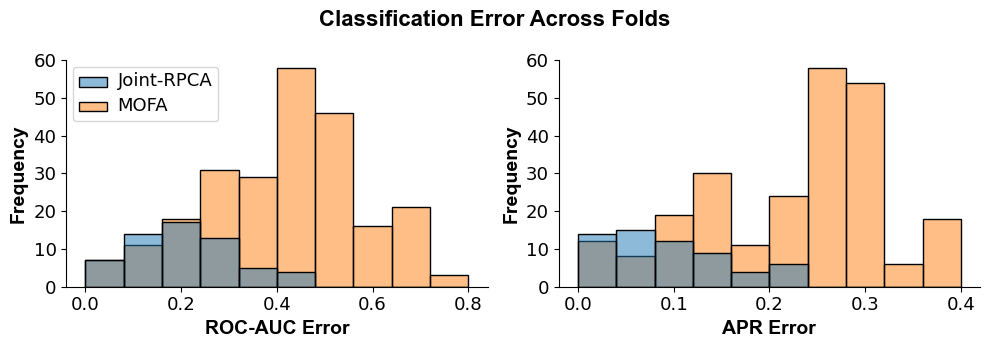

In [ ]:
bins_roc = np.linspace(0, 0.8, 11)
bins_apr = np.linspace(0, 0.4, 11)

fig, axn = plt.subplots(1, 2, figsize=(10, 3.5))
sns.histplot(roc_all_df[roc_all_df.method.isin(["MOFA","Joint-RPCA"])], 
             bins=bins_roc, x='roc_error', hue='method', 
             multiple='layer', stat='count', ax=axn[0])
sns.despine()
axn[0].set_xlabel("ROC-AUC Error", weight='bold', fontsize=14, fontname='Arial')
axn[0].set_ylabel("Frequency", weight='bold', fontsize=14, fontname='Arial')
axn[0].tick_params(axis='x', labelsize=13)
axn[0].tick_params(axis='y', labelsize=13)

leg = axn[0].get_legend()
leg.set_title('')
for t in leg.texts:
    t.set_fontsize(13)
leg.set_loc('upper left')

sns.histplot(apr_all_df[apr_all_df.method.isin(["MOFA","Joint-RPCA"])], 
             bins=bins_apr, x='apr_error', hue='method', 
             multiple='layer', stat='count', ax=axn[1])
sns.despine()
axn[1].set_xlabel("APR Error", weight='bold', fontsize=14, fontname='Arial')
axn[1].set_ylabel("Frequency", weight='bold', fontsize=14, fontname='Arial')
axn[1].legend_.remove()
axn[1].tick_params(axis='x', labelsize=13)
axn[1].tick_params(axis='y', labelsize=13)

#force consistent limits
axn[0].set_ylim(0, 60)
axn[1].set_ylim(0, 60)

plt.suptitle("Classification Error Across Folds", 
             weight='bold', fontsize=16, fontname='Arial')
plt.tight_layout()
plt.savefig("../../results/supp-fig2A.pdf",
            dpi=600, bbox_inches='tight', 
            facecolor=fig.get_facecolor(), edgecolor='none')
plt.savefig("../../results/supp-fig2A.png",
            dpi=600, bbox_inches='tight', 
            facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()

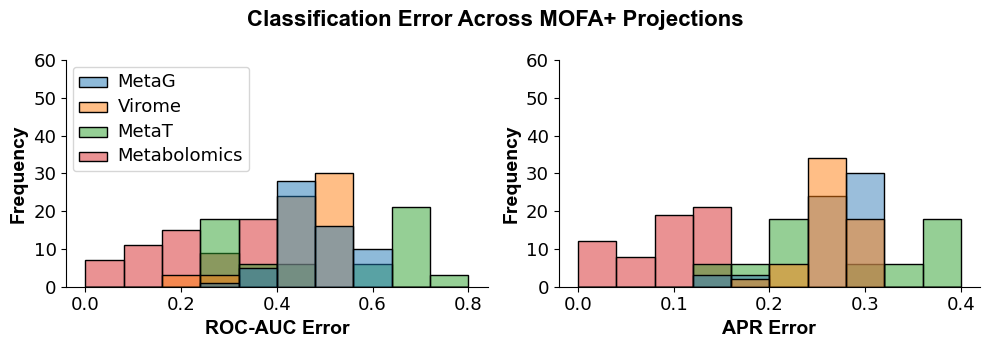

In [23]:
bins_roc = np.linspace(0, 0.8, 11)
bins_apr = np.linspace(0, 0.4, 11)

om_cmap = {'Virome':'#377eb8', 
           'MetaT':'#2ca02c',
           'Metabolomics':'#d62728',
           'MetaG':'#ff7f0e'}

roc_mofa['Omic_Title'] = roc_mofa.projection.map(omic_title)
apr_mofa['Omic_Title'] = apr_mofa.projection.map(omic_title)

fig, axn = plt.subplots(1, 2, figsize=(10, 3.5))
sns.histplot(roc_mofa, bins=bins_roc, x='roc_error', hue='Omic_Title', 
             multiple='layer', stat='count', ax=axn[0])
sns.despine()
axn[0].set_xlabel("ROC-AUC Error", weight='bold', fontsize=14, fontname='Arial')
axn[0].set_ylabel("Frequency", weight='bold', fontsize=14, fontname='Arial')
axn[0].tick_params(axis='x', labelsize=13)
axn[0].tick_params(axis='y', labelsize=13)

leg = axn[0].get_legend()
leg.set_title('')
for t in leg.texts:
    t.set_fontsize(13)
leg.set_loc('upper left')

sns.histplot(apr_mofa, bins=bins_apr, x='apr_error', hue='Omic_Title', 
             multiple='layer', stat='count', ax=axn[1], palette=om_cmap)
sns.despine()
axn[1].set_xlabel("APR Error", weight='bold', fontsize=14, fontname='Arial')
axn[1].set_ylabel("Frequency", weight='bold', fontsize=14, fontname='Arial')
axn[1].legend_.remove()
axn[1].tick_params(axis='x', labelsize=13)
axn[1].tick_params(axis='y', labelsize=13)

#force consistent limits
axn[0].set_ylim(0, 60)
axn[1].set_ylim(0, 60)

plt.suptitle("Classification Error Across MOFA+ Projections",
             weight='bold', fontsize=16, fontname='Arial')
plt.tight_layout()
plt.savefig("../../results/supp-fig2B.pdf",
            dpi=600, bbox_inches='tight', 
            facecolor=fig.get_facecolor(),
            edgecolor='none')
plt.savefig("../../results/supp-fig2B.png",
            dpi=600, bbox_inches='tight', 
            facecolor=fig.get_facecolor(),
            edgecolor='none')
plt.show()